# Comparing C1D output from T62_g37 to 1D_1D

In [1]:
from netCDF4 import Dataset                     # For reading data
from matplotlib import pyplot as plt            # For plotting
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
case1 = 'C1D.T62_g37.southern_ocean.60lev'
case2 = 'C1D.SouthernOcean'
file1 = '/Users/mlevy/scratch/cesm-out/'+case1+'/run/'+case1+'.pop.h.nday1.0001-01-02.nc'
file2 = '/Users/mlevy/scratch/cesm-out/'+case2+'/run/'+case2+'.pop.h.nday1.0001-01-02.nc'
data1 = Dataset(file1)
time  = data1.variables['time'][:]
# (17,18) is Southern Ocean (28 E, 50 S)
HMXL1 = data1.variables['HMXL_2'][:,17,18]
SST1  = data1.variables['SST'][:,17,18]
data2 = Dataset(file2)
HMXL2 = data2.variables['HMXL_2'][:,0,0]
SST2  = data2.variables['SST'][:,0,0]

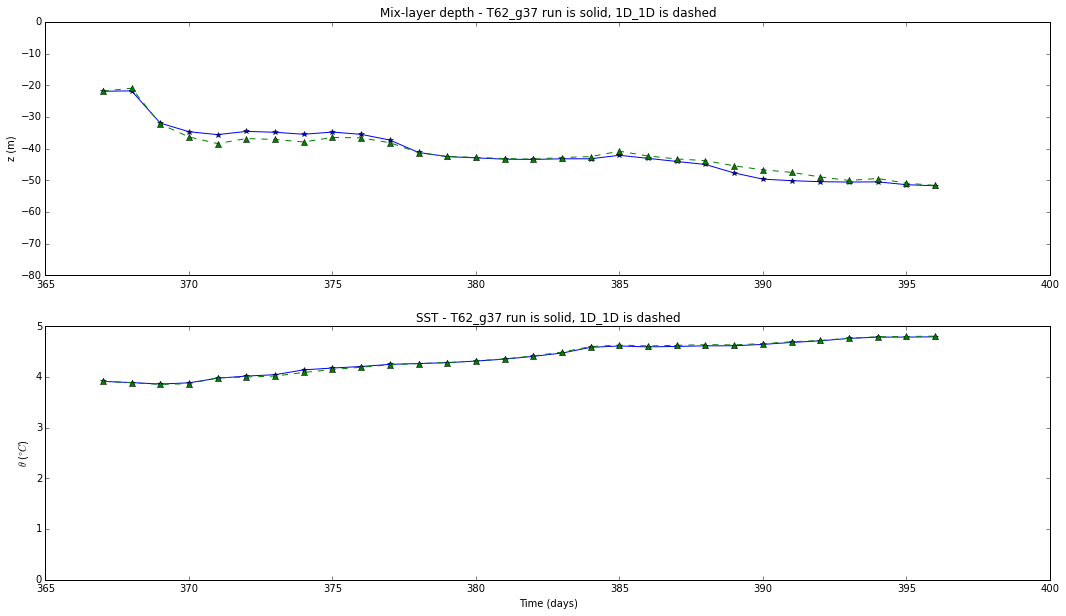

In [3]:
plt.subplot(2,1,1); plt.plot(time, -HMXL1/100,'-*', time, -HMXL2/100, '--^'); plt.ylim((-80,0))
plt.ylabel('z (m)'); plt.title('Mix-layer depth - T62_g37 run is solid, 1D_1D is dashed')
plt.subplot(2,1,2); plt.plot(time, SST1,'-*', time, SST2, '--^'); plt.ylim((0,5))
plt.xlabel('Time (days)'); plt.ylabel(r'$\theta$ (${\degree}C$)')
plt.title('SST - T62_g37 run is solid, 1D_1D is dashed');

293.631 ( 5.67607371205  % )
0.0512576 ( 1.07016497136 % )


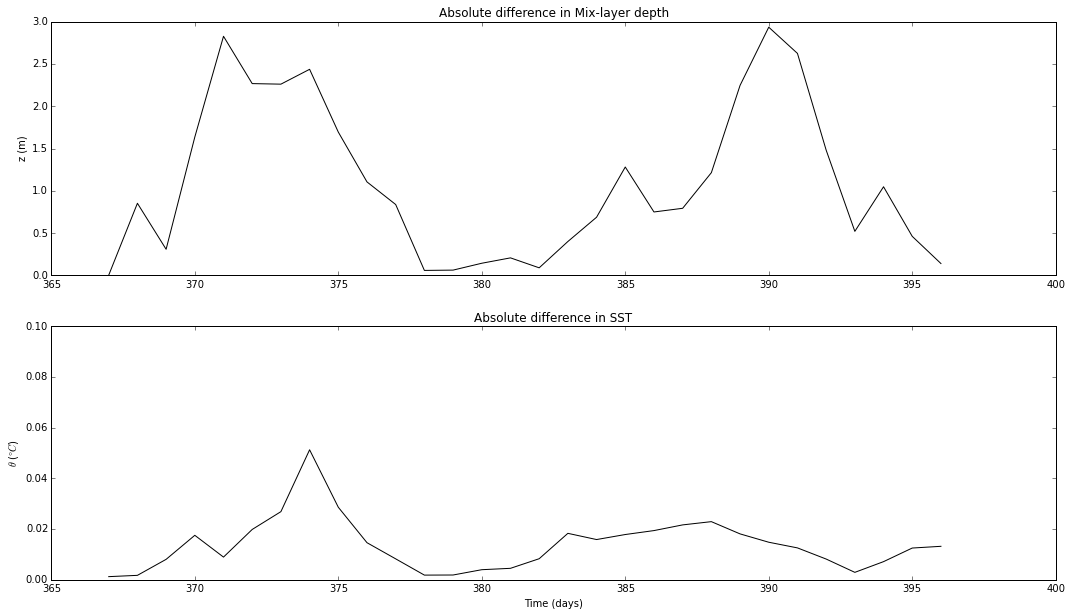

In [4]:
print max(abs(HMXL1-HMXL2)), "(", 100*max(abs(HMXL1-HMXL2))/max(abs(HMXL1)), " % )"
print max(abs(SST1-SST2)), "(", 100*max(abs(SST1-SST2))/max(abs(SST1)), "% )"
plt.subplot(2,1,1); plt.plot(time, abs(HMXL1-HMXL2)/100,'-k'); plt.ylim((0,3))
plt.ylabel('z (m)'); plt.title('Absolute difference in Mix-layer depth')
plt.subplot(2,1,2); plt.plot(time, abs(SST1-SST2),'-k'); plt.ylim((0,0.1))
plt.xlabel('Time (days)'); plt.ylabel(r'$\theta$ (${\degree}C$)')
plt.title('Absolute difference in SST');